# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/    
---

* [1.복습 ](#복습) <br>
* [2.성능 조절](#성능-조절) <br>
     *  [2.1 Model Selection](#Model-Selection)
         * [Discriminative vs Generative model](#discriminative-vs-generative-model)<br>
             *  [Discriminative:LogisticRegression](#LogisticRegression)<br>
             * [Generative:GaussianNB](#GaussianNB)<br>
     *  [2.2 전처리 ](#전처리)
         * [Scaler: 표준화](#표준화)<br>
        
*  [3. Classification Metric](#Classification-Metric)<br>
    * [3.1 confusion_matrix](#confusion_matrix)<br>
    * [3.2classification_report](#classification_report)<br>
        * [Accuracy](#Accuracy)<br>
        * [Precision](#Precision)<br>
        * [Recall](#Recall)<br>
        * [F1-score ](#F1-score)<br>
        
*  [4. kaggle 활용](#kaggle-활용)
     * [titanic](#titanic)<br>
          * [Encoding](#Encoding)<br>
          * [범주화](#범주화)<br>
               * [cut](#cut)<br>
               * [qcut](#qcut)<br>
          * [Aggregation](#Aggregation)<br>

---
### 복습

In [9]:
from sklearn.datasets import load_wine

In [10]:
data=load_wine()

---
1. 데이터 불러오기
    - 데이터를 불러온 이후는 외우고 칠 수 있도록 해야함

In [12]:
import numpy as np
import pandas as pd

In [12]:
wine=pd.DataFrame(data.data,columns=data.feature_names)

In [13]:
wine['target']=data.target

In [14]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


2. EDA

    - wine 데이터 세트에 proline 은 중요한 값이 아님에도 크기와 분포 차이가 크기 때문에 영향력이 다른 요소에 비해 커지는 문제 발생 가능성 있음
    - 전처리 전후로 성능이 어떻게 변하는지 체크

<AxesSubplot:>

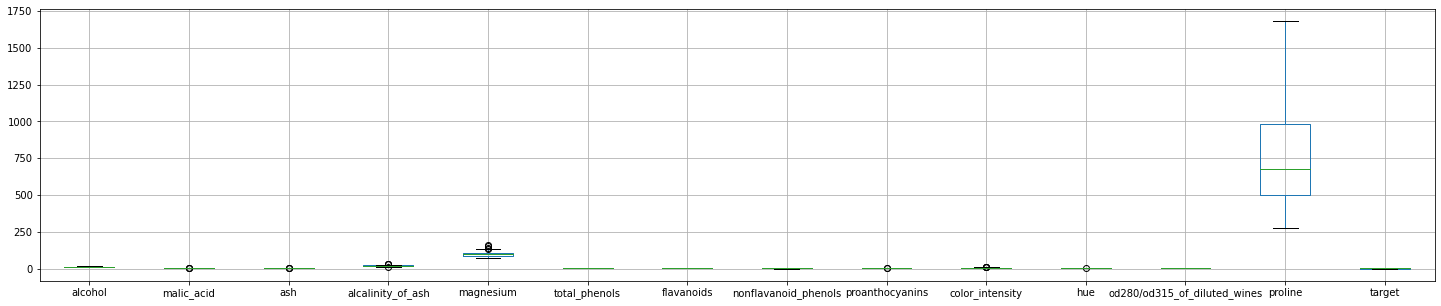

In [15]:
wine.boxplot(figsize=(25,5)) 

In [13]:
import seaborn as sns

3. EDA
    - 데이터에 대해서 이해하여 적절하 전처리, 알고리즘 선택으로 성능을 높일 수 있도록 함
        - 하단의 산점도를 보고 구분(classification) 방법 에대해서 생각해봐야함
             -   linear vs non-linear decision boundary?

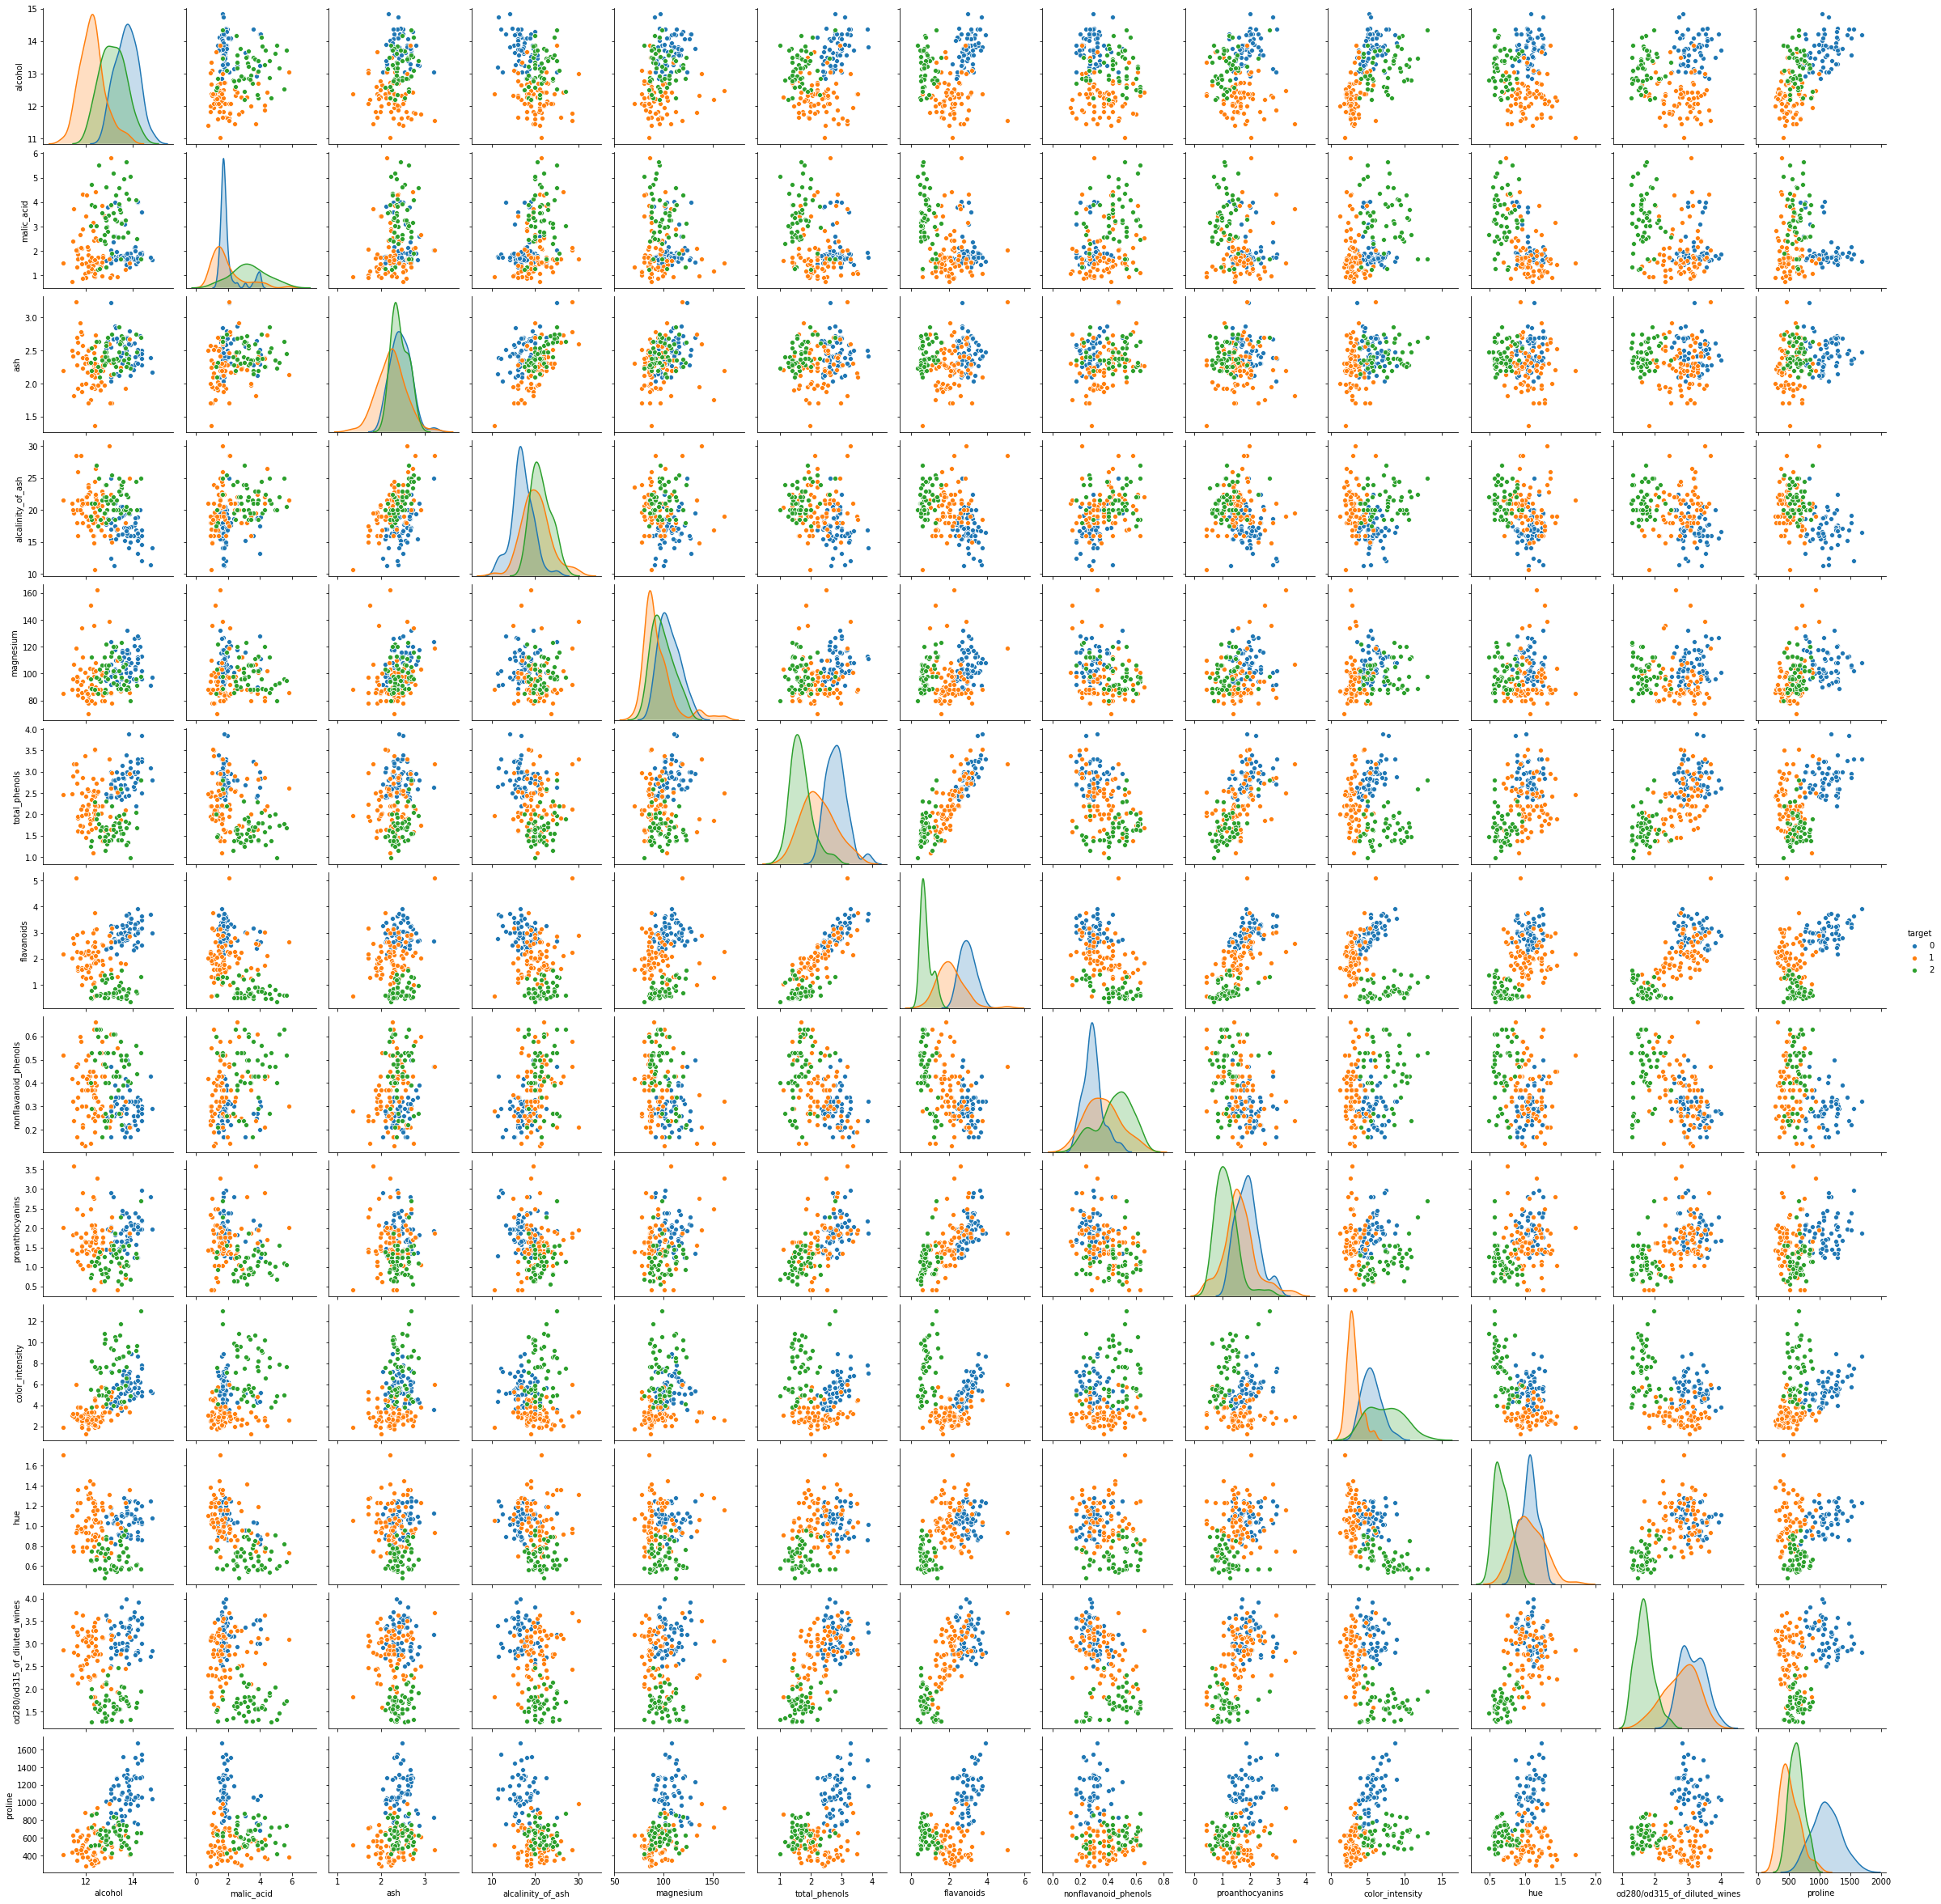

In [17]:
sns.pairplot(wine,hue='target') #13fature 의 분포, 산점도를 target3의 클래스로 구분해서 보여줌

알고리즘 분류기준
- linear : 직선으로  분류 
- non-linear: 곡선으로 분류

 대략적으로 분류했을떄 직선으로 3가지 색상을 분류 할 수 있을지 산점도로 확인

   - 직선으로 3 종류 분류하여도 성능이 나올것이라 생각됨 
     -> linear decision boundary 가능
    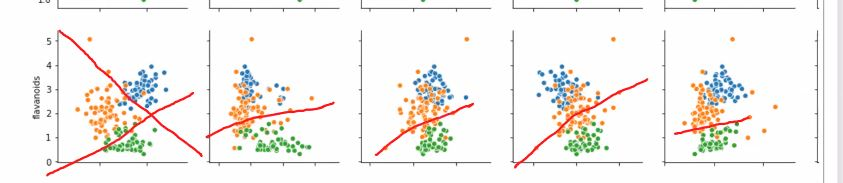

컬럼별 상관관계를 확인
- 숫자는 눈으로 한번에 보기 힘들므로 시각화 이용

In [37]:
wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


- 흰색에 가까우면 양의 상관관계가 높음
- 검은색에 가까우면 음의 상관관계 높음
    - 이런 높은 상관관계는 공분산문제를 가져오므로 feature selection 필요

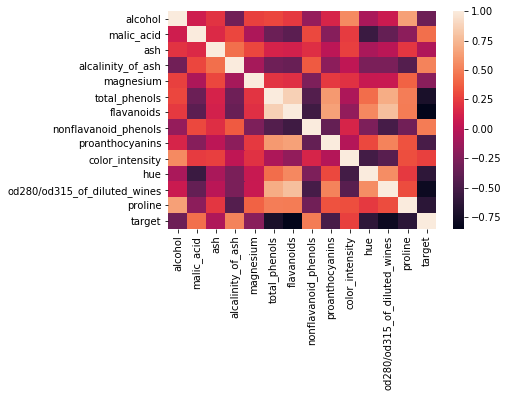

In [39]:
sns.heatmap(wine.corr()) 

데이터의 feature/dimension 은 13개
  - 차원의 저주( 데이터 양에비해 차원이 많음) -> 데이터 전처리 중요성 !

In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [19]:
wine.target.value_counts() #클래스가 3개 0,1,2

1    71
0    59
2    48
Name: target, dtype: int64

클래스는 이산값(0,1,2)로 나눔

- 클래스(target) 기준으로 bar graph를 그리면 값이 0,1,2 이므로 각 바 높이는 0,1,2의 값을 갖음

<AxesSubplot:>

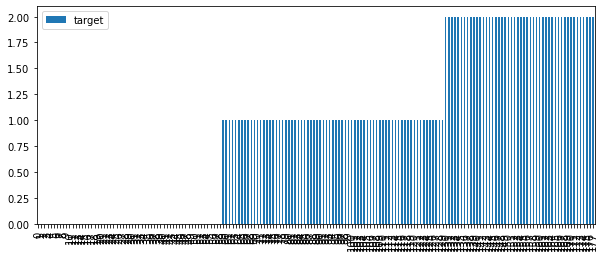

In [20]:
wine[['target']].plot.bar(figsize=(10,4))

target의 3개의 클래스는 다음과 같은 갯수의 값을 갖음

- 산점도의 x축은 attribute, y축은 target(어떤 와인인지)
    - 0번의 와인의 알콜 도수가 평균적으로도 높으며 1번째 와인은 전반적으로 알콜도수가 높으나 차이가 큼

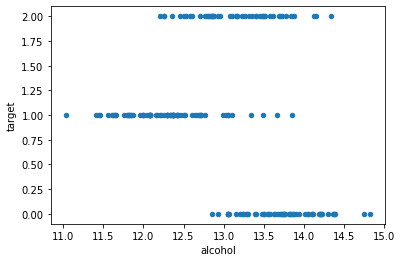

In [21]:
wine.plot.scatter(x='alcohol',y='target');

x축을 각 featrue로 하고 y축은 타겟으로 고정하여 산점도를 그림
와인 0,1,2는 각 특성이 다른것이 보임
- 명백히 지도학습의 분류 문제

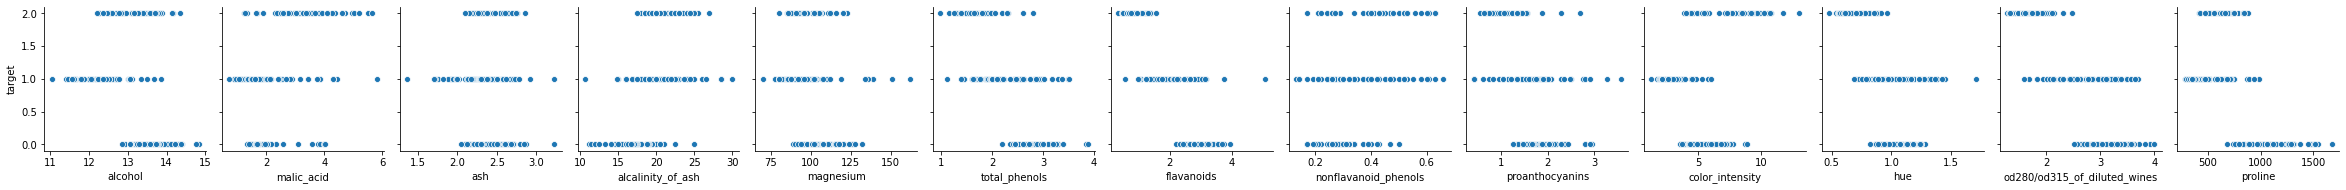

In [33]:
sns.pairplot(wine,y_vars='target',x_vars=(data.feature_names));

지도학습
- classification
    - target 유한개
- regression 
    -  target 무한개 ( 실수 )
    
와인을 세종류로 나누는 문제이기 때문에 이것은 지도학습 classification

label encoding  이용해서 그림

In [14]:
pd.get_dummies(wine['target']) 

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [35]:
t=pd.get_dummies(wine['target']) #label encoding
t['target']=wine.target   #변경한 값 재할당
wine.target               #변경됨

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

모든값이 3개의 카테고리로만 떨어지기 때문에 산점도는 3개의점 


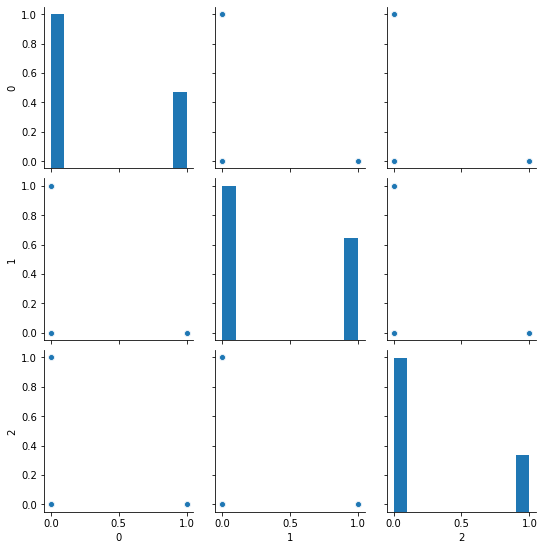

In [41]:
sns.pairplot(pd.get_dummies(wine['target']))

### 성능 조절
### Model Selection
모델 분류하는 방법 많음
linear vs nonlinear
- 성능 비교 linear < nonlinear 
    
>  오캄의 면도날: 
    - 동일한 성능인경우 더 간단한 모델 선호 ->linear > non-linear

## discriminative vs generative model
### discriminative model
- 보통은 decision boundary 이용하여 분류하는 모델
    - 대부분의 지도학습: 로지스틱 회귀, KNN...

### generative model
- 실제 각 클래스의 분포를 모델링

###  LogisticRegression
- 로지스틱 회귀의 이름에 regression 들어가지만 Classification 에 사용
- 선형 회귀와 같이 종속변수와 독립변수간의 관계를 구체적인 함수로 표현.
    - target y: 범주형 데이터
        - **0~1 사이 값**
        - **S curve모양**
        - **분류**

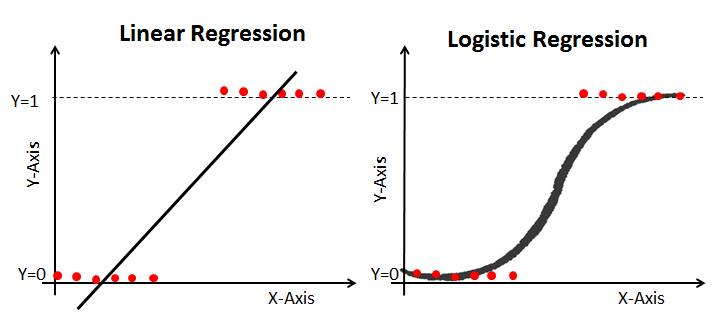
                      식:  $logit =\frac{1}{1+exp(-x)}$

- 선형 회귀는 두개의 클래스를 선형식으로 분류 할 수 없음
- 로지스틱 회귀는 중간의 decision boundary를 기준으로 높거나 낮으면 2개로 분류 가능 
    - **sigmoid** 배울떄 자세히 배울 예정(딥러닝)


### 성능 평가 
####  train_test_split
   - 데이터가 많을때 train,test로 분리(hold out)
   
#### cross_val_score
   - 차원에 비해서 데이터가 적을때 k개의 fold로 나누어 k 개 만큼의 모델을 생성해서 학습 평가
        - 차원의 저주(차원이 클수록 데이터가 많이 필요하기 때문)
            - 컬럼이 13개인데 행이 178개밖에 없음
   - `cross_val_score(estimator, data, cv=None , n_jobs=0)`
     - estimator 모델을 인스턴스화해야함. model( )
      - cv: 교차검증(cross-validation )의 분할 전략을 결정
          - 디폴트: 5-folds 교차 검증
          - integer값을 넣어 folds의 갯수를 적어 k-fold 교차 검증
  
      - n_jobs: 계산을 하기위해 사용하는 CPU의 갯수
          - 디폴트 : 1개사용
          - -1    :전부사용 

In [14]:
from  sklearn.model_selection  import train_test_split,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [25]:
X_train, X_test, y_train, y_test= train_test_split(wine.iloc[:,:-1], wine.target)

cpu를 전체를 사용하여 10개의 fold 교차검즘을 통해 와인데이터 세트를 다양한 classification모델을 비교
- 모델: LogisticRegression,  KNeighborsClassifier,  DecisionTreeClassifier,  GaussianNB 비교)
- 교차검증의 평가지표인 accuracy(정확도)가 10개씩 나오기 떄문에 평균과 분산을 구해 비교

In [27]:
x=cross_val_score(LogisticRegression(),wine.iloc[:,:-1],wine.target,cv=10,n_jobs=-1)  #성능이 좋음
x

array([0.83333333, 0.94444444, 0.88888889, 0.94444444, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [50]:
x.mean(), x.std()  # 값차이는 크지도 않고 정확도도 높음  :)

(0.95, 0.058001702827280836)

In [51]:
x=cross_val_score(KNeighborsClassifier(),wine.iloc[:,:-1],wine.target,cv=10,n_jobs=-1) 
x

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [52]:
x.mean(), x.std() # 값차이는 크지 않지만 정확도가 낮음 :(

(0.6754901960784313, 0.06990791132962103)

분산이 큰 모델: overfiting

In [53]:
x=cross_val_score(DecisionTreeClassifier(),wine.iloc[:,:-1],wine.target,cv=10,n_jobs=-1) 
x

array([0.88888889, 0.88888889, 0.72222222, 0.88888889, 0.83333333,
       0.88888889, 1.        , 0.88888889, 0.94117647, 0.76470588])

In [54]:
x.mean(), x.std() # 값차이는 크지 않지만 정확도가 낮음

(0.8705882352941178, 0.07616833176296091)

In [61]:
x=cross_val_score(GaussianNB(),wine.iloc[:,:-1],wine.target,cv=10,n_jobs=-1)  #성능 가장 안정적이고 가장 정확함 
x

array([0.94444444, 1.        , 1.        , 0.94444444, 0.94444444,
       1.        , 1.        , 0.94444444, 1.        , 1.        ])

In [62]:
x.mean(), x.std() # 값차이는 크지도 않고 정확도도 높음 :o

(0.9777777777777779, 0.027216552697590882)

정확도 기준으로 내림차순 정렬 : GaussianNB > LogisticRegression > DecisionTreeClassifier >KNeighborsClassifier
     - 해당 데이터에서 하이퍼파라미터의 디폴트 값 기반으로 비교한것.

그렇다면 마지막 알고리즘 GaussianNB 저렇게 높은 정확도와 값간의 차이가 작을까..?

 ### GaussianNB
   - Gaussian( 정규분포) Naive-Bayes(NB)
        - **확률기반 모델**로 decision boundary를 찾느것이 아닌 각 데이터의 정규분포(클래스의 특징)를 이용
            - 새로운 데이터가 들어올때 각 class 일 확률을 비교하여 제일 큰 확률을 갖을때 분류시킴
            - 새로운 데이터도 생성 가능
     - 이 외에도 다른 확률 모형(베르누이,다항분포)의 나이브 베이즈 모델도 있음  (나중에 자세히 다룰 예정

## 전처리
필수전처리
- encoding
    - 문자열을 수치로 변경
        - label encoding, One-Hot encoding
- imputing :
    - 결측치(missing data) 처리
        - 대체, 제거
- sacling
    - 수치 데이터간의 스케일 조절
        - 표준화, 정규화,...
### 표준화
- `StandardScaler`
- 대부분의 데이터 세트에서 잘 작동하고 특성이 유지됨
- z-score normalization 라 하며 feature 샘플의 평균 u를 데이터로부터 제거하여 샘플의 표준편차 s 로 나누어 스케일링함
    -  표준 정규 분포를 따름 ( 평균=0, 표준편차=1)
    - $z = \frac{x - u}{s}$

In [23]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss=StandardScaler()  #인스턴스화

In [35]:
ss.fit_transform(wine.iloc[:,:-1]) #표준화됨 

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

target 값 제외하고 모든 features 를 표준화

In [36]:
wine2=wine.copy()          #카피 통해 원래 데이터 유지
wine2.iloc[:,:-1]=ss.fit_transform(wine.iloc[:,:-1])
wine2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


 features 를 표준화한 데이터를 10 folds 교차 검증

In [37]:
x=cross_val_score(LogisticRegression(),wine.iloc[:,:-1],wine.target,cv=10,n_jobs=-1)
x

array([0.83333333, 0.94444444, 0.88888889, 0.94444444, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [38]:
x.mean(), x.var()

(0.95, 0.003364197530864198)

In [39]:
x=cross_val_score(LogisticRegression(),wine2.iloc[:,:-1],wine2.target,cv=10,n_jobs=-1)
x #값들이 전반적으로 높은 정확도를 보임

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [40]:
x.mean(), x.var() # 높은 정확도와 낮은 표준편차

(0.9777777777777779, 0.0007407407407407415)

비교 하였더니 standardscaler로 featrues를 표준화한 데이터가 성능이 좋음
- 전처리의 중요성!!

In [44]:
x=cross_val_score(KNeighborsClassifier(),wine.iloc[:,:-1],wine.target,cv=10,n_jobs=-1)
x

array([0.66666667, 0.66666667, 0.61111111, 0.61111111, 0.61111111,
       0.61111111, 0.72222222, 0.66666667, 0.82352941, 0.76470588])

In [45]:
x.mean(), x.var()

(0.6754901960784313, 0.004887116066470157)

In [42]:
x=cross_val_score(KNeighborsClassifier(),wine2.iloc[:,:-1],wine2.target,cv=10,n_jobs=-1)
x

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       0.94444444, 1.        , 1.        , 0.94117647, 0.94117647])

In [43]:
x.mean(), x.var()

(0.9604575163398692, 0.0006716433850228549)

전처리한 데이터 세트에서는 knn의 정확도가 월등하게 높아짐

표준화 한다음 예측

In [64]:
from sklearn.neighbors import KNeighborsClassifier 

In [52]:
knn=KNeighborsClassifier()

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
knn.score(X_test,y_test)  #0.71!!!

0.7111111111111111

In [55]:
knn.predict(X_test)

array([1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       2])

## Classification Metric

### confusion_matrix
- classification 모델의 정확도(accuracy) 평가를 행렬로 표현
   - 행: 실제 값
   - 열: 예측 값
       - True/False: 예측이 맞는지 틀린지 (1 or 0 , binary classification)
       - Positive/Neagetive : 클래스로 여기면 됨. 
   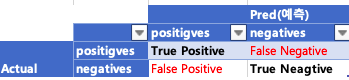
   
   - **행렬의 대각원소**(대각선에 위치한 값 예. 1행 1열, 2행2열...): **실제와 예측 맞음**
        - **True** positives(TP) : 실제 positive 인데 예측과 맞음 (True,True)
        - **True** negatives (TN): 실제 negative 인데   예측과 맞음 (False,False)
   - 그외에 위치한 원소: **예측 틀림**
        - **False** positives(FP): 실제 positive 인데  예측과 틀림 
            - type1 error 제 1종오류


        - **False** negatives(FN): 실제 negative 인데 예측과 틀림 
            - type2 error 제 2종오류 
                - 2NE...투에니원을 떠올리면 외우기 쉬움
 * 이를 이용해서 다양한 평가 지표 이용 가능(예. Recall, Precision, F-1 Score...)


상황에 따라서 문제의 심각성이 다름

In [53]:
cross_val_score(LogisticRegression(),wine.iloc[:,:-1],wine.target,cv=10, n_jobs=-1)

array([0.83333333, 0.94444444, 0.88888889, 0.94444444, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [54]:
X_train, X_test, y_train, y_test= train_test_split(wine.iloc[:,:-1], wine.target)

In [55]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\AI02\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### confusion_matrix 해석

- 0번은 17개중 15개 맞추고 2개 틀림,
- 1번은 18개이고 다 맞춤
- 2번은 11개이고 다 맞춤

사이킷럿에서는 실제값이 인덱스, 예측값이 컬럼으로 오기 떄문에 주의

In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lr.predict(X_test))

array([[15,  2,  0],
       [ 0, 18,  0],
       [ 0,  0, 10]], dtype=int64)

#### Accuracy
혼동 행렬을 이용한 accuracy 구하기
- 혼돈 행렬의 대각선: 실제값을 제대로 예측 (정답)
- 대각 선 외의 원소: 실제값을 다른 값으로 예측
    - $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}=\frac{15+18+10}{17+18+10}=\frac{43}{45}=0.956$

In [204]:
confusion_matrix(y_test,lr.predict(X_test)).diagonal() #대각선

array([15, 18, 10], dtype=int64)

대각선의 값들의 합= 45

In [206]:
t=confusion_matrix(y_test,lr.predict(X_test)).sum()
t

45

In [208]:
confusion_matrix(y_test,lr.predict(X_test)).diagonal().sum()/ t #대각선

0.9555555555555556

In [209]:
lr.score(X_test,y_test) #위와 동일

0.9555555555555556

`confusion_matrix(y_test,lr.predict(X_test),normalize='true')`
- 각 클래스별로 맞춘 비율 보여줌
0번은 17개중 15개 맞췃으니 15/17=0.882...
1,2번은 모두 맞추어 1

In [200]:
confusion_matrix(y_test,lr.predict(X_test),normalize='true')

array([[0.88235294, 0.11764706, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

### classification_report
- 주요 분류 측정 지표를 텍스트 포맷의 리포트로 만들어줌
    -  각 클래스 별로 precision, recall, F1 score 계산  

In [25]:
from sklearn.metrics import classification_report

In [211]:
classification_report(y_test, lr.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94        17\n           1       0.90      1.00      0.95        18\n           2       1.00      1.00      1.00        10\n\n    accuracy                           0.96        45\n   macro avg       0.97      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'

In [212]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Confusion Matrix 이용한 Binary Classification(이진 분류) 평가지표 4가지
- 이전까지는 acurracy만 확인함

#### Accuracy
   - `Accuracy`(정확성)
        - 예측과 정답이 얼마나 정확한 비율
        - $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$
        
#### Precision
   - `Precision`(정밀도)
        - 양성으로 예측한 것 중에서 양성이 맞는 비율(세로 기준)
        -  예측한 것 중 정답 비율
         - $Precision = \frac{TP}{TP+FP}$
         
####  Recall     
   - `Recall or Sensitivity` (재현율)
        - 실제 양성인 것  중에서 양성으로 예측한 비율(가로 기준)
        - 실제 정답 비율
        - $Recall = \frac{TP}{TP+FN}$
        
#### F1-score       
   - `f1-score`
        - 정밀도와 재현율의 조평균
        -  precision 과 recall 은 tradeoff 관계이기 때문에 이들의 평균 이용
            - $F_1 = 2 * \frac{Precision * Recall}{Precision + Recall}= 2* \frac{1}{ \frac{1}{Precision} + \frac{1}{Recall}} $
            
            - 0~1 사이 값을 갖으며 1 에 가까울 수록 좋음
       - support 
       
   ##### macro avg
  - 동일한 가중치를 적용
       - $\frac{F1_{class1} +F1_{class2}+ ...+F1_{classN}}{N}$
       
  ##### weighted avg 
   - 데이터의 갯수만큼 가중치를 주어 다수인 데이터 유리
       - $  F1_{class1}*W_1 +F1_{class2}*W_2+ ...+F1_{classN}*W_N $

-     시스템에 따른 평가척도가 다름
- 참고 :https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=ko

In [212]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        10

    accuracy                           0.96        45
   macro avg       0.97      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



아래의 confusion matrix의 결과값 바탕으로 `classification_report` 동일한결과 값을 얻어보기

In [201]:
confusion_matrix(y_test,lr.predict(X_test))

array([[15,  2,  0],
       [ 0, 18,  0],
       [ 0,  0, 10]], dtype=int64)

In [27]:
print( 'Accuracy :' , 43/45) #컬럼 기준으로 보면 편리

Accuracy : 0.9555555555555556


In [220]:
print( 'precision :',15/15, 18/20 , 10/10) #컬럼 기준으로 보면 편리

precision : 1.0 0.9 1.0


In [26]:
print( 'Recall :',15/17, 18/18 , 10/10)   #가로 기준으로 보면 편리

Recall : 0.8823529411764706 1.0 1.0


In [226]:
(1+0.88)/2 , ( 0.90  + 1.00 )/2 ,(1+1)/2

(0.94, 0.95, 1.0)

In [32]:
print ( 'macro avg:',(0.94+0.95+1)/3)

macro avg: 0.9633333333333333


In [34]:
print('weighted avg: ' ,17/45*0.94+ 18/45*0.95+ 10/45*1)

weighted avg:  0.9573333333333333


### SCORERS
- 48개의다양한 평가지표

In [35]:
from sklearn.metrics import SCORERS

In [36]:
SCORERS.keys() #다양한 48개의 평가 지표

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [65]:
len(SCORERS.keys())

48

`cross_val_score ( scoring= )`
- weighted :비율
- macro :평균
- micro  :전체 중에서 봄

In [293]:
cross_val_score(LogisticRegression(),wine2.iloc[:,:-1],
                wine2.target,cv=10, scoring='recall_micro')

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [294]:
cross_val_score(LogisticRegression(),wine2.iloc[:,:-1],
                wine2.target,cv=10, scoring='recall_macro')

array([0.93333333, 0.95238095, 0.95238095, 0.95238095, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [295]:
cross_val_score(LogisticRegression(),wine2.iloc[:,:-1],
                wine2.target,cv=10, scoring='recall_weighted')

array([0.94444444, 0.94444444, 0.94444444, 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

 **목적에 맞는**  metric 척도 정하는게 중요함
 > specific 문제 해결 ->평가 척도 달라짐

   - 사기 감지 시스템 만들것

In [276]:
import numpy as np


recall 실제 사기가 2건 있었는데 1건 맞춤
- Anomaly1의 recall :0.5
- Anomaly2의 recall :0
    - recall 실제 사기가 1건 있었는데 0건 맞춤

In [53]:
Anomaly1= np.array([[999999,0],[1,1]]) 
Anomaly1

array([[999999,      0],
       [     1,      1]])

In [58]:
Anomaly2= np.array([[999999,0],[1,0]])
Anomaly2

array([[999999,      0],
       [     1,      0]])

사기 탐지에서 두 시스템에서 거의 동일한 정확도를 갖음
- 발생률이 낮기 때문임

In [56]:
Anomaly1.diagonal().sum()/ confusion1.sum()

0.999999000001

In [57]:
Anomaly2.diagonal().sum()/ confusion1.sum()

0.999999000001

둘다 동일한 정확도이면 recall만 비교했을때 
- 사기방지시스템 Anomaly1 > Anomaly2
    - 실제 사기였을때 사기로 탐지하는 확률이 더 높기 떄문 

고려할 사항
- 모델
- 하이퍼 파라미터 조정
- 평가 척도 (목적에 맞게)

---
## kaggle 활용
 https://www.kaggle.com/
- competition: 상금타기도 가능
- data : 연습용 데이터 세트 제공
    - 분석을 공유하면서 대중화됨
    - 머신러닝,딥러닝 공부하는 입장에서는 좋음
        - 다른사람들이 어떻게 했는지 Kaggle Notebook 참고 
        
### titanic
- 타이타닉호의 이용객들의 생존여부를 예측하는데이터 세트
    - 각 이용객들이 개인정보와 이용내역에대해 나옴
    - binary classification : survied 1 or 0 

- data 로 부터 **specific 문제 해결**을 위한 최적의 모델 만들기
 
참고 : 타이타닉 데이터 노트북 :https://www.kaggle.com/c/titanic/notebooks?sortBy=voteCount&group=everyone&pageSize=20&competitionId=3136 

In [15]:
titanic = sns.load_dataset('titanic') #seaborn의 타이타닉 데이터를 불러옴

Notebooks에서 most voted :  https://www.kaggle.com/startupsci/titanic-data-science-solutions
        
1. 데이터 불러오기 (acquire data)
    - 데이터는 많을 수록 좋음
    - train, test를 합쳐서 사용
        - cross validation 에서 전체 데이터 다 사용하는것과 같음
2. 데이터 정보
    - info, descibe, head, tail ,sample

In [16]:
titanic                              #DataFrame 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
titanic.head() #앞의 5개

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic.tail(3) #끝의 3개

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


checklist :
1. encoding : 문자열을 바꿔야함
     - accessor: category.cat, object.str
     - map,apply,applymap
     - labelencoding,Hot_encoder
2. 결측치 처리
     - deck 컬럼과  age 컬럼에 결측치가 있음 

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [20]:
titanic.describe() #분포 확인

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic.describe(include=['category','object'])  #문자열

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [22]:
titanic.describe(include=['int64','float64'])   #수치형

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


각 attribute의 분포를 확인 
- fare 컬럼에 이상치가 많음
- 컬럼간의 스케일 차이가 있음.

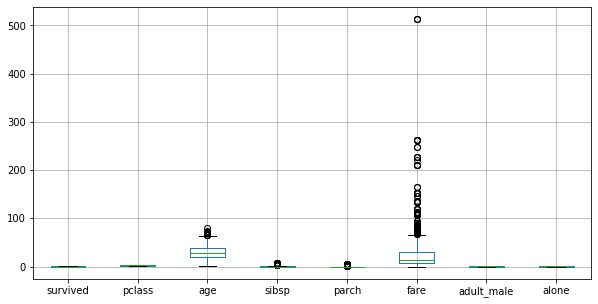

In [23]:
titanic.boxplot(figsize=(10,5))

>check list :
    **1. encoding : 문자열을 바꿔야함**
        - accessor: category.cat, object.str
        - map,apply,applymap
        - labelencoding,Hot_encoder
    2. 결측치 처리
        - deck 컬럼과  age 컬럼에 결측치가 있음 
        
아까의 check list를 바탕으로 encoding으로 수치화

## Encoding
### label encoding
categoty의 label encoding

In [25]:
titanic['class'].cat.codes  #accessor

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Length: 891, dtype: int8

map 의 label encoding

In [26]:
titanic.sex=titanic.sex.map({'male':1, 'female':0})
titanic.sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int64

sklearn 의 label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
le=LabelEncoder()

In [29]:
le.fit_transform(titanic.sex)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

### one-hot encoding
sklearn 의 OneHotEncoder
- 0이 많은 array 로 변경됨.(sparse matrix라고 함)
     -  분류한 갯수 만큼 차원이 늘어나는 단점

In [30]:
ohe=OneHotEncoder()

In [31]:
ohe.fit_transform(titanic[['sex']]) #fancy indexing 방식

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [32]:
ohe.fit_transform(titanic[['sex']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

>check list :
    1. encoding : 문자열을 바꿔야함
        - accessor: category.cat, object.str
        - map,apply,applymap
        - labelencoding,Hot_encoder
   **2. 결측치 처리**
        - deck 컬럼과  age 컬럼에 결측치가 있음 
        
아까의 check list를 바탕으로 결측치 처리 해야함

In [33]:
import missingno as mino

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.6+ KB


결측치를 시각화하여보니 age, deck에는 많은 결측치가 존재
- 특히 deck은 결측치가 데이터보다 많음을 알 수 있음

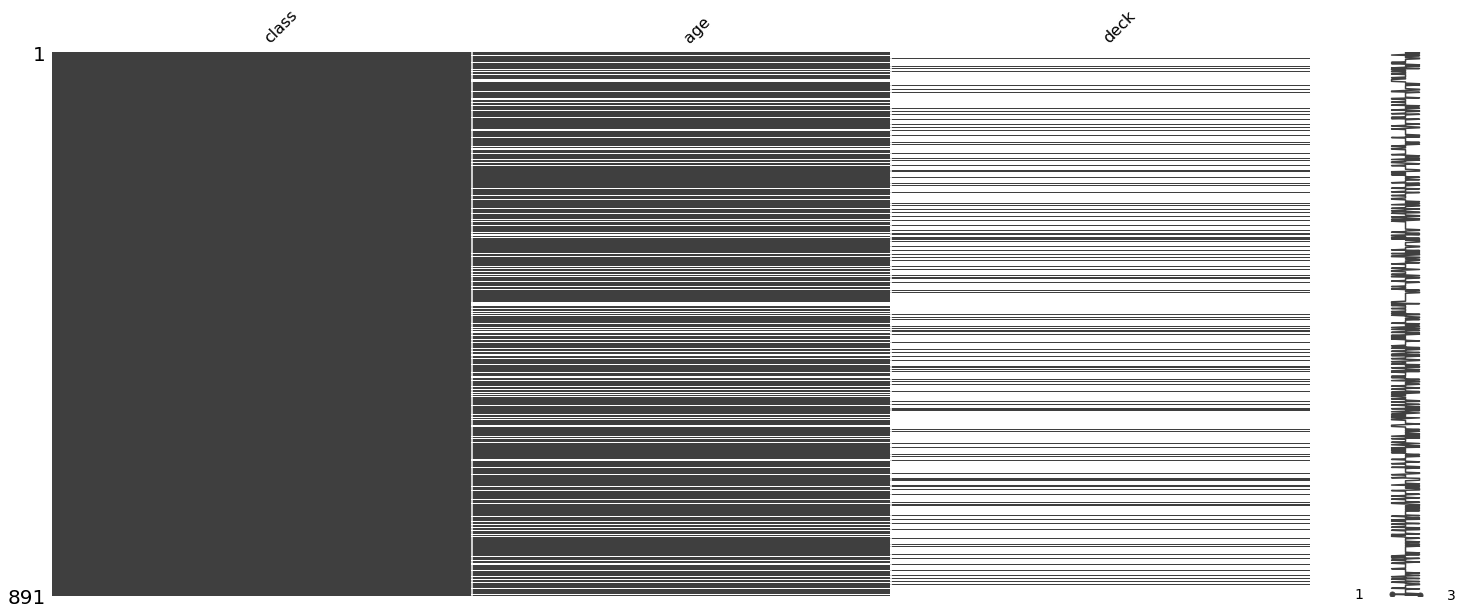

In [35]:
mino.matrix(titanic[['class','age','deck']]) #각 컬럼 비교.

덜 중요한 변수 제거
deck 은 203개 데이터 밖에 없어 약 600개 이상이 결측치

dropna()로 열 제거 혹은 인덱스 제거 
- age에는 na가 더이사 없는것을 확인. 

In [44]:
titanic['age'].dropna(axis=0).isna().sum()

0

- age, deck 열 제거

In [46]:
titanic.dropna(axis=1) 

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,1,1,0,7.2500,Third,man,True,no,False
1,1,1,0,1,0,71.2833,First,woman,False,yes,False
2,1,3,0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,0,1,0,53.1000,First,woman,False,yes,False
4,0,3,1,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,Second,man,True,no,True
887,1,1,0,0,0,30.0000,First,woman,False,yes,True
888,0,3,0,1,2,23.4500,Third,woman,False,no,False
889,1,1,1,0,0,30.0000,First,man,True,yes,True


In [47]:
age= titanic.age.dropna()
age


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

문자열 대체

In [24]:
titanic.embark_town.str.replace('Southampton','southampton')

0      southampton
1        Cherbourg
2      southampton
3      southampton
4      southampton
          ...     
886    southampton
887    southampton
888    southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

### 범주화

- discretizer는 수치형 데이터를 범주화함
    - 모든 regresssion 은 classification 으로 바꿀수 있음
- `cut( , 길이)`
    - 동일한 길이로 나누어 범주화
        - 각 범주다 갯수 무관
- `qcut( q= )`
    - **동일한 갯수**로 나누어 범주화
        - 범주의 크기 상이하지만 동일한 갯수

In [49]:
pd.cut(age, bins=2)

0      (0.34, 40.21]
1      (0.34, 40.21]
2      (0.34, 40.21]
3      (0.34, 40.21]
4      (0.34, 40.21]
           ...      
885    (0.34, 40.21]
886    (0.34, 40.21]
887    (0.34, 40.21]
889    (0.34, 40.21]
890    (0.34, 40.21]
Name: age, Length: 714, dtype: category
Categories (2, interval[float64]): [(0.34, 40.21] < (40.21, 80.0]]

In [51]:
pd.cut(age,3).value_counts()

(26.947, 53.473]    345
(0.34, 26.947]      319
(53.473, 80.0]       50
Name: age, dtype: int64

In [50]:
pd.qcut(age,q=3).value_counts()

(0.419, 23.0]    246
(34.0, 80.0]     236
(23.0, 34.0]     232
Name: age, dtype: int64

### Aggregation
각 atrribute을 참고하여 생존여부를 확인하기

* Aggregation 분석
    - groupby
    - pivot_table
    - crosstab


- 성별에 따른 생존률

남자의 탑승인원이 여자보다 1.5배이상 많음

In [146]:
titanic.groupby('sex').count()[['survived']]  #총 인원수 : male >female 

,survived
sex,
female,314
male,577


탑승인원 차이에도 불구하고 여자가 남자의 두배만큼 생존함

In [147]:
titanic.groupby('sex').sum()[['survived']]     #생존자 수: male <female

,survived
sex,
female,233
male,109


`groupby.agg`를 이용하여 한번에 여러 수치 요약을 볼수 있음
  - count: 전체 인원 수
  - sum : 생존한 인원 수
      - 여자의 생존률이 남성의 생존률보다 높다

In [148]:
titanic.groupby('sex').agg(['count','sum'])[['survived']]  #위의 총 인원수와 생존자수 비교

survived     
          count  sum
sex                 
female      314  233
male        577  109

- 좌석 클래스에 따른 사람의 생존 비교
    - 생존률 : first > second> Third 클래스 순

- 2,3, 등석의 남자들은 제일 생존률이 낮음
    - 구조보트의 노를 저어야 하기 때문이라 함..

In [150]:
titanic.groupby('class').agg(['count','sum'])[['survived']]  #1/

survived     
          count  sum
class               
First       216  136
Second      184   87
Third       491  119

클래스별 성별 생존 비교
- 각 클래스별로 여성의 생존률이 제일 높음.
- Third Class 가 제일 낮음

In [151]:
titanic.groupby(['class','sex']).agg(['count','sum'])[['survived']] 

survived    
                 count sum
class  sex                
First  female       94  91
       male        122  45
Second female       76  70
       male        108  17
Third  female      144  72
       male        347  47

- 각 클래스 별로남자 미성년자들이 대부분 살아남음

In [153]:
titanic.groupby(['class','sex','adult_male']).agg(['count','sum'])[['survived']]  #1/

survived      
                            count   sum
class  sex    adult_male               
First  female False            94  91.0
              True              0   NaN
       male   False             3   3.0
              True            119  42.0
Second female False            76  70.0
              True              0   NaN
       male   False             9   9.0
              True             99   8.0
Third  female False           144  72.0
              True              0   NaN
       male   False            28   9.0
              True            319  38.0

이름 앞에 title을 이용해서 분석함
- 높은 위치?

호칭이 붙은사람들은 대부분 살아남 
특히 Mrs 가 제일 높음.

pandas,sklearn 는 kaggle 통해 정리하는게 좋음
